<a href="https://colab.research.google.com/github/yordanovagabriela/neuralnetworks/blob/master/House_Prices_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [186]:
!pip install keras

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.2.0


# Load Dataset

In [188]:
dataset = pd.read_csv('./kc_house_data.csv')
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Preprocess Data

## Cleanup columns

In [189]:
del dataset['id']
del dataset['date']
del dataset['zipcode']

## Check for unknown values

In [190]:
dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Split features from labels

In [191]:
# Convert to categorical data, i.e [[1., 0.], [0., 1.]..]
y = dataset['view'].values
y = to_categorical(y)
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [192]:
X = dataset.drop('view',axis=1)

## Normalize the data

In [193]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

## Split data into train and test

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [195]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 17290
Test set size: 4323


# Build model

In [196]:
from tensorflow.keras import regularizers
def build_model():
  model = keras.Sequential([
    layers.Flatten(input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu', kernel_initializer= tf.keras.initializers.RandomNormal(mean=0., stddev=1.)),
    layers.BatchNormalization(),
    #layers.Dense(64, activation='relu', kernel_initializer= tf.keras.initializers.RandomNormal(mean=0., stddev=1.)),
    layers.Dense(5, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.SGD()

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model = build_model()

# Train model

In [197]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=5, min_lr=0.0001)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=64, epochs=50, shuffle=True, callbacks=[es])

Epoch 1/50
271/271 [==============================] - 1s 5ms/step - loss: 0.7142 - accuracy: 0.8443 - val_loss: 0.4506 - val_accuracy: 0.9015
Epoch 2/50
271/271 [==============================] - 1s 4ms/step - loss: 0.4217 - accuracy: 0.8989 - val_loss: 0.4107 - val_accuracy: 0.9035
Epoch 3/50
271/271 [==============================] - 1s 5ms/step - loss: 0.4107 - accuracy: 0.9002 - val_loss: 0.4118 - val_accuracy: 0.9040
Epoch 4/50
271/271 [==============================] - 1s 5ms/step - loss: 0.4067 - accuracy: 0.9002 - val_loss: 0.4028 - val_accuracy: 0.9038
Epoch 5/50
271/271 [==============================] - 1s 5ms/step - loss: 0.4056 - accuracy: 0.8999 - val_loss: 0.4025 - val_accuracy: 0.9008
Epoch 6/50
271/271 [==============================] - 1s 5ms/step - loss: 0.4036 - accuracy: 0.8995 - val_loss: 0.4141 - val_accuracy: 0.9035
Epoch 7/50
271/271 [==============================] - 1s 5ms/step - loss: 0.4009 - accuracy: 0.9000 - val_loss: 0.4067 - val_accuracy: 0.9017
Epoch 

## Create a graph of accuracy and loss over time

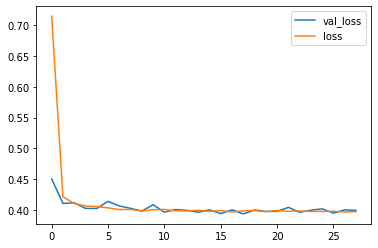

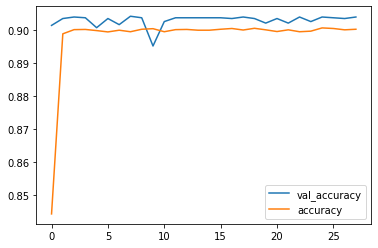

In [198]:
losses = pd.DataFrame(model.history.history)
losses[['val_loss', 'loss']].plot()
losses[['val_accuracy', 'accuracy']].plot()

## Make predictions

In [199]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

136/136 - 0s - loss: 0.3938 - accuracy: 0.9040
